# components

[Standardize] features and use [principal component analysis] to reduce the number of columns.

[Standardize]: https://en.wikipedia.org/wiki/Standard_score
[principal component analysis]: https://en.wikipedia.org/wiki/Principal_component_analysis

In [1]:
from pandas import DataFrame, read_csv
from seaborn import pairplot
from sklearn.decomposition import PCA

from tools import afew, irisdata, princols, zscores

## load the scikit-learn [iris flower dataset]

[iris flower dataset]: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
iris = irisdata()
afew(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
121,5.6,2.8,4.9,2.0,virginica
10,5.4,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
138,6.0,3.0,4.8,1.8,virginica


In [3]:
# separate target column (what we want to predict) from features
target = iris['species']
feats = iris[iris.columns.drop('species')]
feats.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


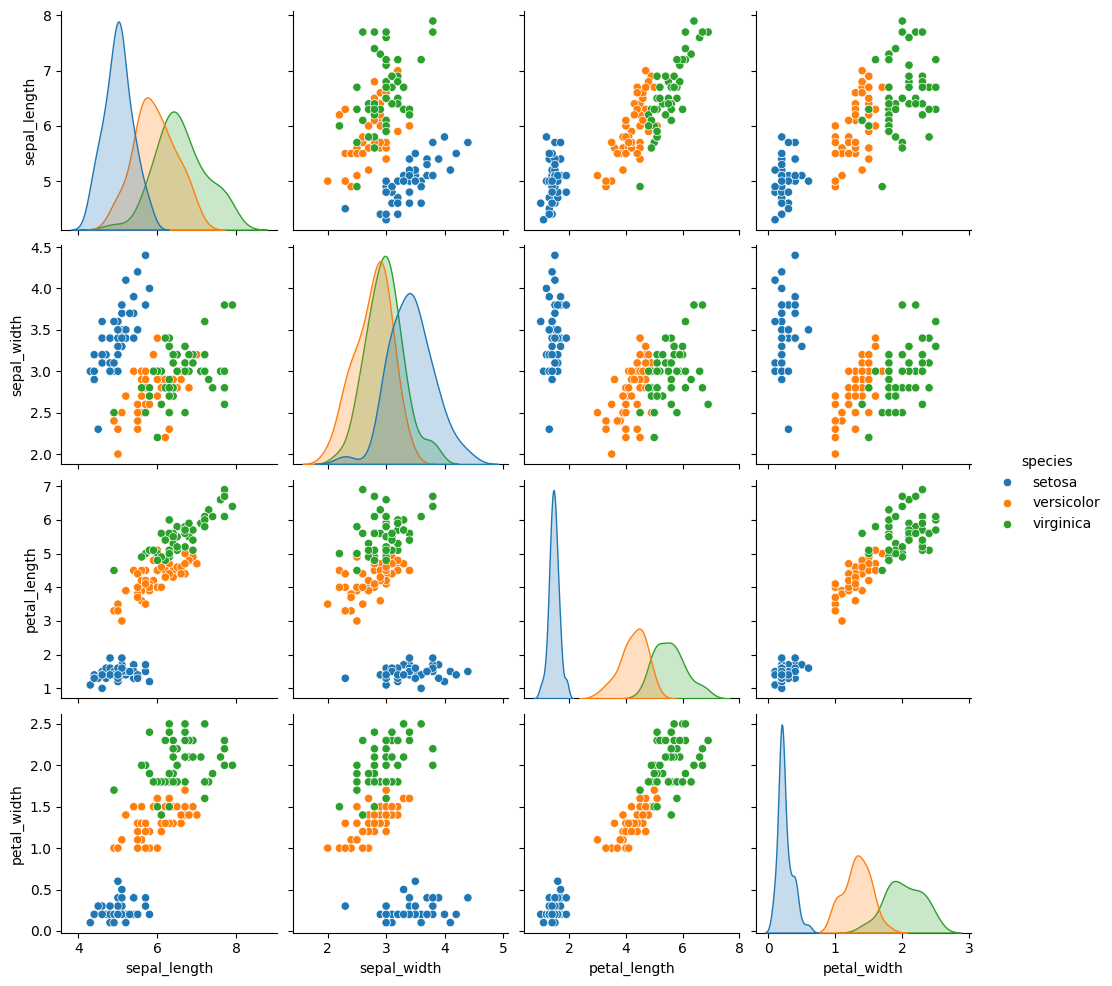

In [4]:
pairplot(iris, hue='species')

## standardize features

In [5]:
sfeats = zscores(feats)
sfeats.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994
149,0.068433,-0.131539,0.760211,0.788031


In [6]:
sfeats.mean()

sepal_length   -5.210647e-16
sepal_width    -7.815970e-16
petal_length   -2.368476e-16
petal_width    -2.842171e-16
dtype: float64

In [7]:
sfeats.var()

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

## standardize features (robust mode)

In [8]:
rfeats = zscores(feats, robust=True)
rfeats.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,1.314508,0.000000,0.570981,1.551189
146,0.730282,-1.512097,0.436632,0.930714
147,1.022395,0.000000,0.570981,1.085832
148,0.584226,1.209677,0.705329,1.551189
149,0.146056,0.000000,0.503807,0.775595


In [9]:
rfeats.median()

sepal_length    0.000000e+00
sepal_width     0.000000e+00
petal_length    2.983724e-16
petal_width     0.000000e+00
dtype: float64

In [10]:
rfeats.abs().mean()

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

## find top 2 principal components

In [11]:
pcdata = princols(zscores(iris), 2)
pcdata.tail()

,pc0,pc1,species
145,-1.864258,0.385674,virginica
146,-1.559356,-0.893693,virginica
147,-1.516091,0.268171,virginica
148,-1.368204,1.007878,virginica
149,-0.957448,-0.024250,virginica


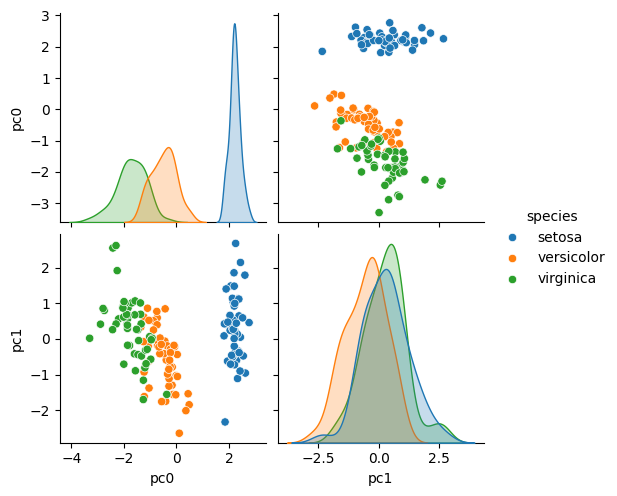

In [12]:
pairplot(pcdata, hue='species')

## find top 2 principal components (using scikit-learn)

In [13]:
pcfeats = PCA(2).fit_transform(zscores(feats))
pcfeats = DataFrame(pcfeats, columns=['pc0','pc1'])
pcfeats.tail()

,pc0,pc1
145,1.864258,0.385674
146,1.559356,-0.893693
147,1.516091,0.268171
148,1.368204,1.007878
149,0.957448,-0.024250


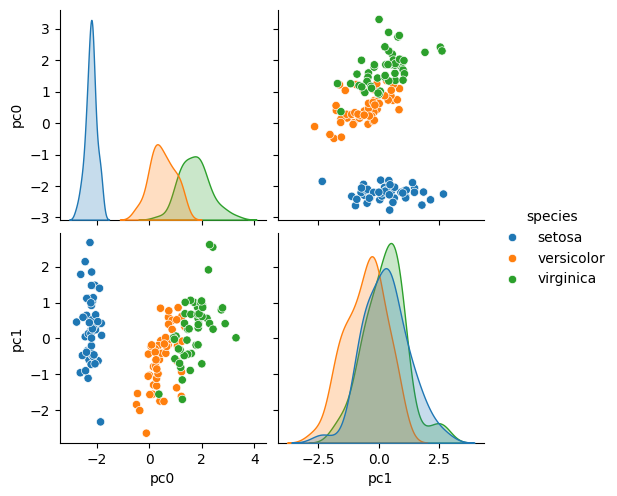

In [14]:
pairplot(pcfeats.join(target), hue='species')